# PI_02 Data_Analytics - Mauro Ferrera

In [196]:
# Importacion de librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.use('TkAgg')
import seaborn as sns 
import pandas_profiling 
%matplotlib inline


In [217]:
# Importacion de los datos sobre internet 
Penetracion          = pd.read_csv('Csvs\\Internet_Penetracion.csv'                     ) 
BAF                  = pd.read_csv('Csvs\\Internet_BAF (2).csv'                         )
Acceso_x_tecnologia  = pd.read_csv('Csvs\\Internet_Accesos-por-tecnologia.csv'          ) 
Velocidad_internet   = pd.read_csv('Csvs\\historico_velocidad_internet (2).csv'         )
Acceso_x_velocidad   = pd.read_csv('Csvs\\Internet_Accesos-por-velocidad (1).csv'       )
Ingresos             = pd.read_csv('Csvs\\Internet_Ingresos.csv'                        )


### 1- Datasets Penetracion-EDA

In [247]:
Penetracion['Accesos por cada 100 hogares'] = Penetracion['Accesos por cada 100 hogares'].str.replace(',','.').astype(float) # Cambiamos el tipo de dato que viene por defecto(object) a float
print(Penetracion.shape)# Visualizamos cantidad de filas y columnas
Penetracion.head(2)

(840, 4)


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28


In [163]:
#Encontrar outliers o valores atipicos del datasets 'Penetracion'
Q1= Penetracion.quantile(0.25)
Q3= Penetracion.quantile(0.75)
IQR = Q3 -Q1

limite_inf = Q1  - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (Penetracion < limite_inf) | (Penetracion > limite_sup)
valores_atipicos = Penetracion[mascaras]
valores_atipicos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\1471774970.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mascaras = (Penetracion < limite_inf) | (Penetracion > limite_sup)


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,122.28
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
835,NaN,NaN,NaN,NaN
836,NaN,NaN,NaN,NaN
837,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN


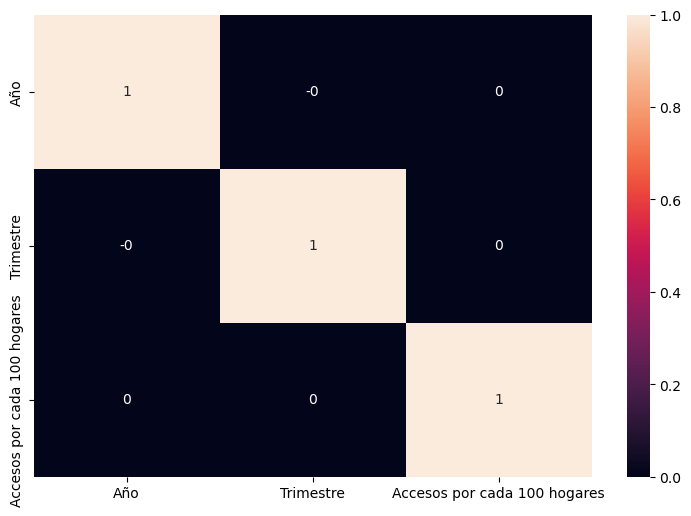

In [164]:
# Correlacion entre los datos de 'Penetracion'
datos_corr = Penetracion.corr().round()
plt.figure(figsize=(9,6))
sns.heatmap(data=datos_corr,annot=True)
plt.show()

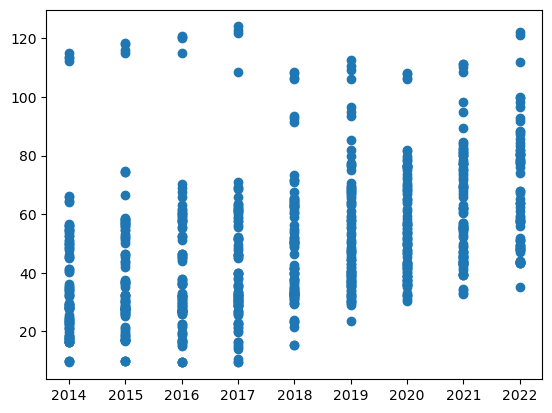

In [165]:
#Grafico de distribucion de 'Penetracion'

x=Penetracion['Año']
y=Penetracion['Accesos por cada 100 hogares']
plt.scatter(x,y)
plt.show()


In [166]:
Penetracion.isnull().sum() # Contamos nulos 

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [167]:
Penetracion.info() # Info de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [168]:
Penetracion.describe() # Descripcion estadistica

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


### 2- Datasets BAF-EDA

In [248]:
print(BAF.shape)
BAF.head(2)

(840, 6)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679


In [199]:
BAF['Banda ancha fija'] = BAF['Banda ancha fija'].str.replace('.', '').astype(float) # Cambiamos los tipos de datos a los correctos
BAF['Dial up'] = BAF['Dial up'].str.replace('-','')
BAF['Dial up'] = BAF['Dial up'].str.replace('.', '').astype(float)
BAF['Total'] = BAF['Total'].str.replace('.', '').astype(float)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\1188752540.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  BAF['Dial up'] = BAF['Dial up'].str.replace('.', '').astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\1188752540.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  BAF['Total'] = BAF['Total'].str.replace('.', '').astype(float)


In [203]:
### Encontrar outliers o valores atipicos del datasets 'BAF'
Q1= BAF.quantile(0.25)
Q3= BAF.quantile(0.75)
IQR = Q3 -Q1

limite_inf = Q1  - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (BAF < limite_inf) | (BAF > limite_sup)
valores_atipicos = BAF[mascaras]
valores_atipicos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\3375921348.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mascaras = (BAF < limite_inf) | (BAF > limite_sup)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,NaN,NaN,NaN,NaN,6199.0,4721668.0
1,NaN,NaN,NaN,NaN,2145.0,1547679.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
835,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,NaN,NaN,NaN,NaN,506612.0
837,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN


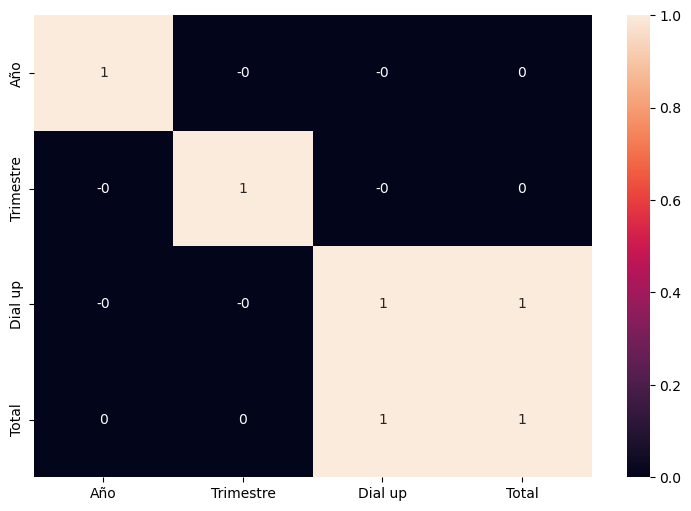

In [204]:
### Correlacion entre los datos de 'BAF'
datos_corr = BAF.corr().round()
plt.figure(figsize=(9,6))
sns.heatmap(data=datos_corr,annot=True)
plt.show()

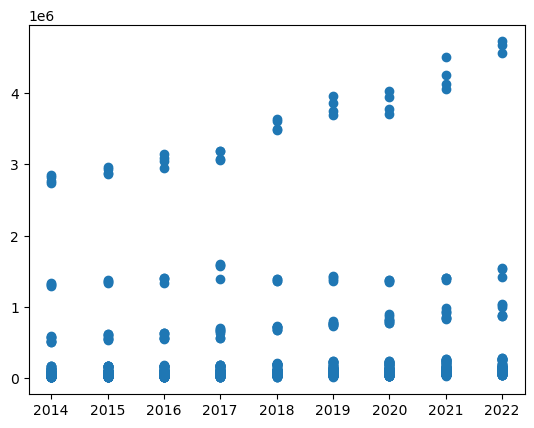

In [205]:
#### Grafico de dispersion de 'BAF'

x=BAF['Año']
y=BAF['Total']
plt.scatter(x,y)
plt.show()


In [201]:
BAF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               840 non-null    int64  
 1   Trimestre         840 non-null    int64  
 2   Provincia         840 non-null    object 
 3   Banda ancha fija  840 non-null    object 
 4   Dial up           838 non-null    float64
 5   Total             840 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 39.5+ KB


In [206]:
BAF.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64

In [207]:
BAF.describe()

,Año,Trimestre,Dial up,Total
count,840.000000,840.000000,838.000000,8.400000e+02
mean,2017.885714,2.457143,976.632458,3.457417e+05
std,2.528745,1.105009,2420.735737,7.419436e+05
min,2014.000000,1.000000,0.000000,1.255700e+04
25%,2016.000000,1.000000,9.000000,5.202975e+04
50%,2018.000000,2.000000,148.000000,1.034895e+05
75%,2020.000000,3.000000,619.000000,1.779148e+05
max,2022.000000,4.000000,15229.000000,4.721668e+06


### 3-Datasets Acceso_x_tecnologia-EDA


In [173]:
print(Acceso_x_tecnologia.shape)
Acceso_x_tecnologia.head(2)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022


In [224]:
Acceso_x_tecnologia['ADSL'] = Acceso_x_tecnologia['ADSL'].str.replace('.','').astype(float)
Acceso_x_tecnologia['Cablemodem'] = Acceso_x_tecnologia['Cablemodem'].str.replace('.','').astype(float)
Acceso_x_tecnologia['Fibra optica'] = Acceso_x_tecnologia['Fibra óptica'].str.replace('.','').astype(float)
Acceso_x_tecnologia['Total'] = Acceso_x_tecnologia['Total'].str.replace('.','').astype(float)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\166670323.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Acceso_x_tecnologia['ADSL'] = Acceso_x_tecnologia['ADSL'].str.replace('.','').astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\166670323.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Acceso_x_tecnologia['Cablemodem'] = Acceso_x_tecnologia['Cablemodem'].str.replace('.','').astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\166670323.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex

In [226]:
### Encontrar outliers o valores atipicos del datasets 'Acceso_x_tecnologia'
Q1= Acceso_x_tecnologia.quantile(0.25)
Q3= Acceso_x_tecnologia.quantile(0.75)
IQR = Q3 -Q1

limite_inf = Q1  - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (Acceso_x_tecnologia < limite_inf) | (Acceso_x_tecnologia > limite_sup)
valores_atipicos = Acceso_x_tecnologia[mascaras]
valores_atipicos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\620244630.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mascaras = (Acceso_x_tecnologia < limite_inf) | (Acceso_x_tecnologia > limite_sup)


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo,Fibra optica
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2871541.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2723285.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


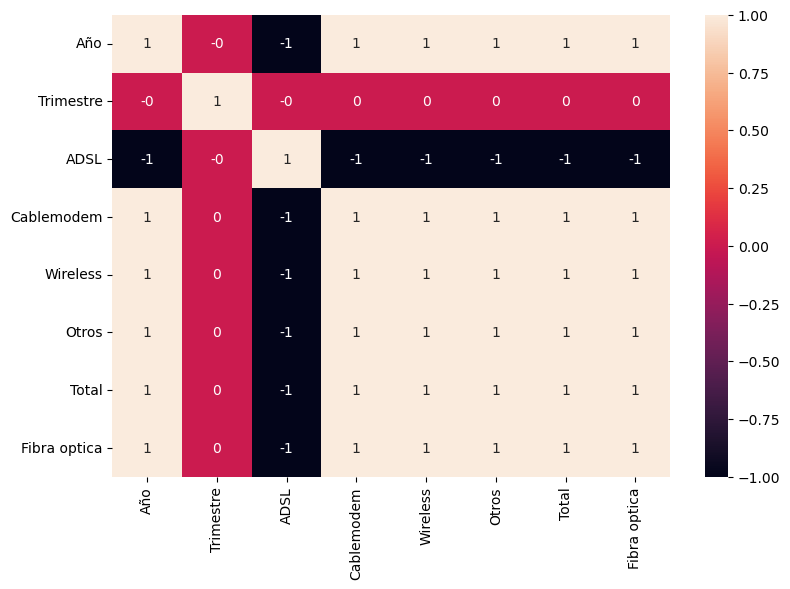

In [227]:
### Correlacion entre los datos de 'BAF'
datos_corr = Acceso_x_tecnologia.corr().round()
plt.figure(figsize=(9,6))
sns.heatmap(data=datos_corr,annot=True)
plt.show()

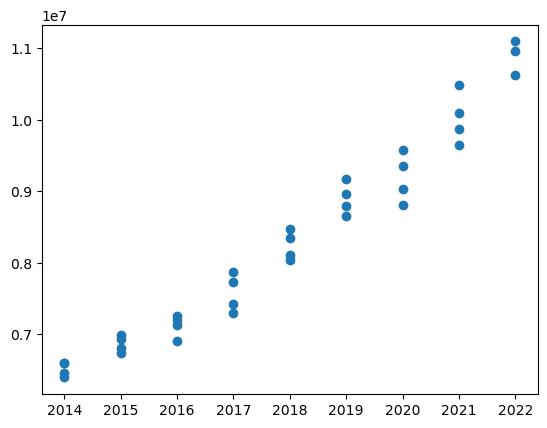

In [228]:
#### Grafico de dispersion de 'Acceso_x_tecnologia'

x=Acceso_x_tecnologia['Año']
y=Acceso_x_tecnologia['Total']
plt.scatter(x,y)
plt.show()


In [208]:
Acceso_x_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [229]:
Acceso_x_tecnologia.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
Fibra optica    0
dtype: int64

In [249]:
Acceso_x_tecnologia.describe()

,Año,Trimestre,ADSL,Cablemodem,Wireless,Otros,Total,Fibra optica
count,35.000000,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01,3.500000e+01
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,248.280029,147.431086,8.297800e+06,7.390627e+05
std,2.564135,1.120474,8.354122e+05,1.225277e+06,174.354293,85.868717,1.399611e+06,7.861772e+05
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,70.749000,54.300000,6.398398e+06,1.391870e+05
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,85.107500,62.763500,7.057455e+06,1.679880e+05
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,194.267000,100.554000,8.110444e+06,2.262850e+05
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,394.963000,247.918500,9.260442e+06,1.138802e+06
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,557.110000,265.328000,1.109113e+07,2.871541e+06


### 4-Datasets velocidad_internet-EDA

In [231]:
print(Velocidad_internet.shape)
Velocidad_internet.head(2)

(840, 6)


,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN


In [233]:
Velocidad_internet = Velocidad_internet.drop(columns=['Unnamed: 4','Unnamed: 5'])

In [237]:
### Encontrar outliers o valores atipicos del datasets 'Velocidad_internet'
Q1= Velocidad_internet.quantile(0.25)
Q3= Velocidad_internet.quantile(0.75)
IQR = Q3 -Q1

limite_inf = Q1  - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (Velocidad_internet < limite_inf) | (Velocidad_internet > limite_sup)
valores_atipicos = Velocidad_internet[mascaras]
valores_atipicos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\1794094457.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mascaras = (Velocidad_internet < limite_inf) | (Velocidad_internet > limite_sup)


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,NaN,NaN,NaN,70.0
1,NaN,NaN,NaN,101.0
2,NaN,NaN,NaN,61.0
3,NaN,NaN,NaN,53.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
835,NaN,NaN,NaN,NaN
836,NaN,NaN,NaN,NaN
837,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN


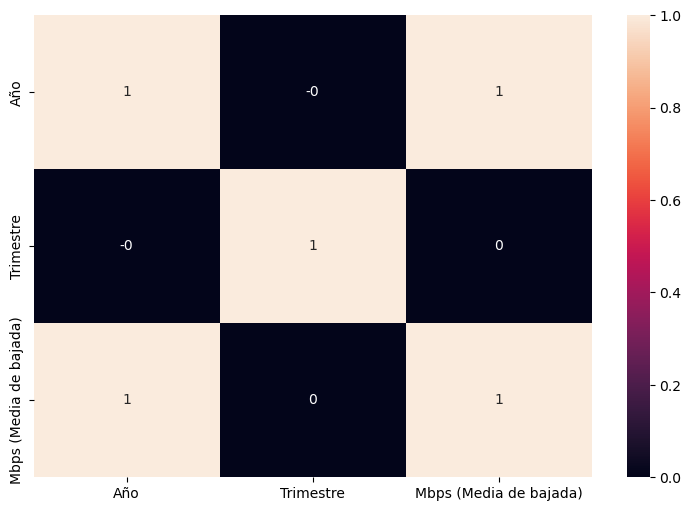

In [236]:
### Correlacion entre los datos de 'Velocidad_internet'
datos_corr = Velocidad_internet.corr().round()
plt.figure(figsize=(9,6))
sns.heatmap(data=datos_corr,annot=True)
plt.show()

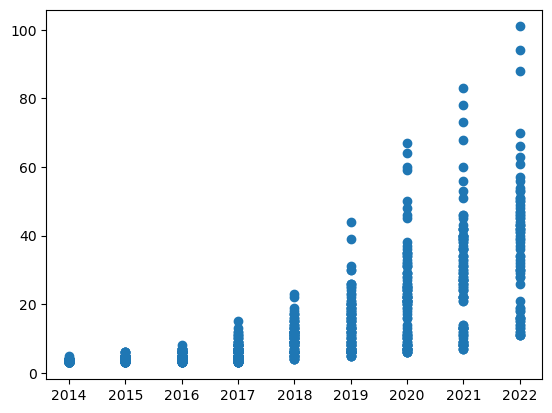

In [238]:
#### Grafico de dispersion de 'Velocidad_internet'

x=Velocidad_internet['Año']
y=Velocidad_internet['Mbps (Media de bajada)']
plt.scatter(x,y)
plt.show()


In [234]:
Velocidad_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [232]:
Velocidad_internet.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Mbps (Media de bajada)      0
Unnamed: 4                840
Unnamed: 5                840
dtype: int64

In [251]:
Velocidad_internet.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.841667
std,2.528745,1.105009,14.669499
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,4.000000
50%,2018.000000,2.000000,7.000000
75%,2020.000000,3.000000,18.000000
max,2022.000000,4.000000,101.000000


### 5-Datasets Acceso_x_velocidad-EDA 

In [240]:
print(Acceso_x_velocidad.shape)
Acceso_x_velocidad.head(2)

(840, 12)


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679


In [242]:
Acceso_x_velocidad['+ 1 Mbps - 6 Mbps'] = Acceso_x_velocidad['+ 1 Mbps - 6 Mbps'].str.replace('.','').astype(float)
Acceso_x_velocidad['+ 30 Mbps'] = Acceso_x_velocidad['+ 30 Mbps'].str.replace('.','').astype(float)
Acceso_x_velocidad['Total'] = Acceso_x_velocidad['Total'].str.replace('.','').astype(float)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\2416130025.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Acceso_x_velocidad['+ 1 Mbps - 6 Mbps'] = Acceso_x_velocidad['+ 1 Mbps - 6 Mbps'].str.replace('.','').astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\2416130025.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Acceso_x_velocidad['+ 30 Mbps'] = Acceso_x_velocidad['+ 30 Mbps'].str.replace('.','').astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\2416130025.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as lit

In [243]:
### Encontrar outliers o valores atipicos del datasets 'Acceso_x_velocidad'
Q1= Acceso_x_velocidad.quantile(0.25)
Q3= Acceso_x_velocidad.quantile(0.75)
IQR = Q3 -Q1

limite_inf = Q1  - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (Acceso_x_velocidad < limite_inf) | (Acceso_x_velocidad > limite_sup)
valores_atipicos = Acceso_x_velocidad[mascaras]
valores_atipicos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\629905512.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mascaras = (Acceso_x_velocidad < limite_inf) | (Acceso_x_velocidad > limite_sup)


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,NaN,NaN,NaN,NaN,NaN,290315.0,297.915,267.044,NaN,3618689.0,65.821,4721668.0
1,NaN,NaN,NaN,517.0,NaN,NaN,NaN,NaN,NaN,1253105.0,105.477,1547679.0
2,NaN,NaN,NaN,NaN,384.0,NaN,NaN,NaN,NaN,50298.0,NaN,NaN
3,NaN,NaN,NaN,461.0,987.0,NaN,NaN,NaN,NaN,79390.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,NaN,NaN,NaN,NaN,345225.0,NaN,NaN,NaN,NaN,NaN,506013.0
837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


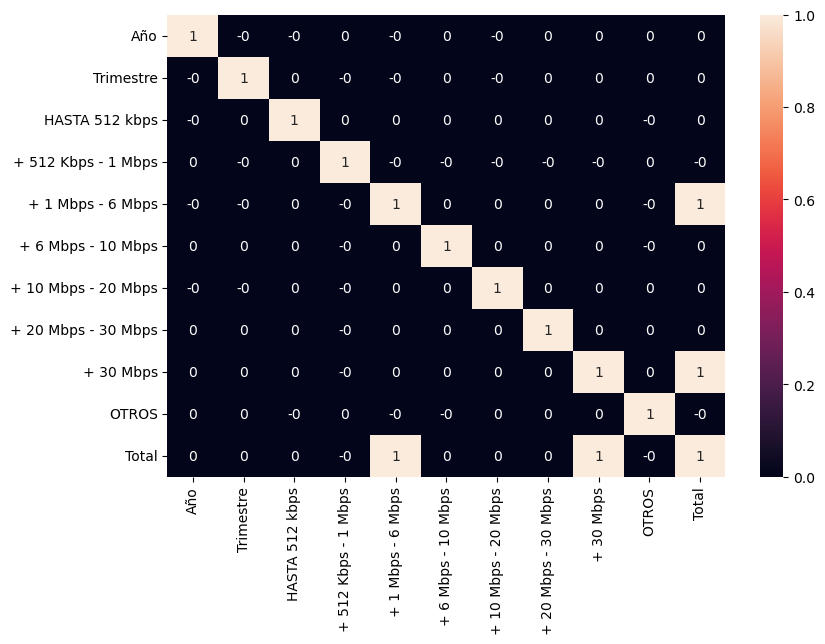

In [244]:
### Correlacion entre los datos de 'Acceso_x_velocidad'
datos_corr = Acceso_x_velocidad.corr().round()
plt.figure(figsize=(9,6))
sns.heatmap(data=datos_corr,annot=True)
plt.show()

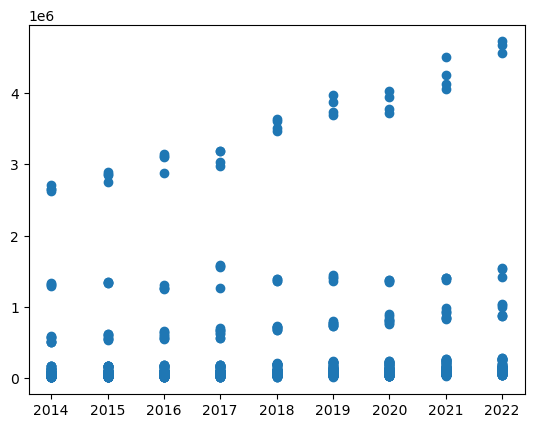

In [245]:
#### Grafico de dispersion de 'Acceso_x_velocidad'

x=Acceso_x_velocidad['Año']
y=Acceso_x_velocidad['Total']
plt.scatter(x,y)
plt.show()

In [241]:
Acceso_x_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [246]:
Acceso_x_velocidad.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [252]:
Acceso_x_velocidad.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,840.000000,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,834.000000,8.400000e+02
mean,2017.885714,2.457143,126.009998,101.790393,1.509700e+05,71.417265,79.988627,100.758158,7.917956e+04,32.937064,3.439888e+05
std,2.528745,1.105009,187.578607,207.396126,3.481538e+05,140.324223,170.586599,208.683467,3.426234e+05,128.937905,7.373366e+05
min,2014.000000,1.000000,1.007000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1.945000,1.240600e+04
25%,2016.000000,1.000000,10.000000,3.362500,2.853925e+04,5.357250,4.872000,2.019000,7.000000e+00,0.000000,5.232825e+04
50%,2018.000000,2.000000,50.000000,8.788000,4.883450e+04,20.157000,14.965500,11.251500,8.825000e+02,0.000000,1.043330e+05
75%,2020.000000,3.000000,134.000000,84.340500,8.689750e+04,62.225500,55.093000,64.286250,1.966075e+04,7.497750,1.775798e+05
max,2022.000000,4.000000,998.000000,999.000000,2.299705e+06,917.000000,978.000000,997.000000,3.618689e+06,923.000000,4.721668e+06


### 6-Datasets Ingresos-EDA

In [253]:
print(Ingresos.shape)
Ingresos.head(3)

(35, 4)


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022


In [256]:
Ingresos['Ingresos (miles de pesos)'] = Ingresos['Ingresos (miles de pesos)'].str.replace('.','').astype(float)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\824704817.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Ingresos['Ingresos (miles de pesos)'] = Ingresos['Ingresos (miles de pesos)'].str.replace('.','').astype(float)


In [258]:
### Deteccion de outliers en el datasets 'Ingresos'
Q1 = Ingresos.quantile(0.25)
Q3 = Ingresos.quantile(0.75)
IQR= Q3  - Q1 
limite_inf = Q1  - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (Ingresos < limite_inf) | (Ingresos > limite_sup)
valores_atipicos = Ingresos[mascaras]
valores_atipicos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7364\566485347.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mascaras = (Ingresos < limite_inf) | (Ingresos > limite_sup)


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


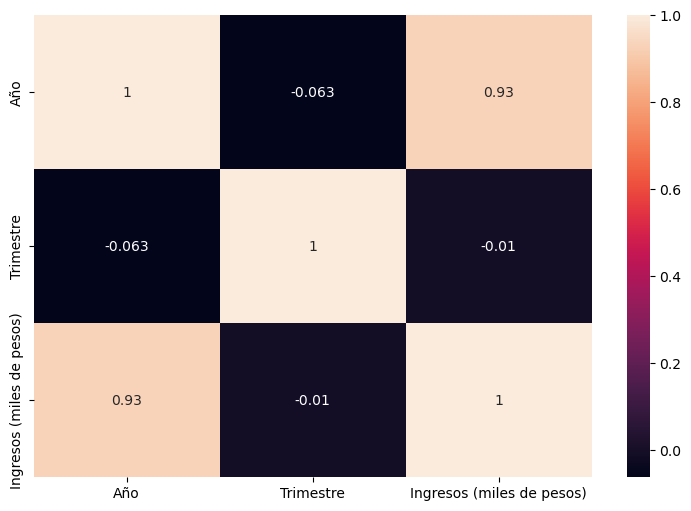

In [259]:
#### Correlacion en mapa de calor del datasets 'Ingresos'
corr = Ingresos.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data=corr,annot=True)
plt.show()

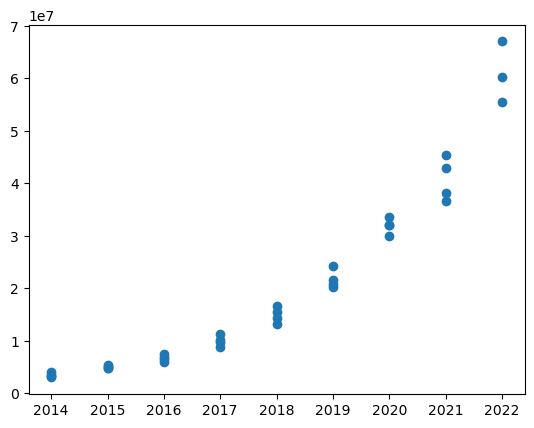

In [260]:
#### Dispersion de los datos
x = Ingresos['Año']
y= Ingresos['Ingresos (miles de pesos)']
plt.scatter(x,y)
plt.show()

In [257]:
Ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        35 non-null     int64  
 1   Trimestre                  35 non-null     int64  
 2   Ingresos (miles de pesos)  35 non-null     float64
 3   Periodo                    35 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [261]:
Ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [262]:
Ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,2.058845e+07
std,2.564135,1.120474,1.774214e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.500000,6.235543e+06
50%,2018.000000,2.000000,1.431947e+07
75%,2020.000000,3.000000,3.204996e+07
max,2022.000000,4.000000,6.705593e+07


## Creacion de reporte con Pandas_profiling - 3 primeros datasets

In [264]:
# Concatenamos Penetracion + BAF + Acceso_x_tecnologia
penetracion_baf_accso_tec = pd.merge(Penetracion, BAF, on=['Año','Trimestre'])
penetracion_baf_accso_tec1 = pd.merge(penetracion_baf_accso_tec,Acceso_x_tecnologia, on=['Año','Trimestre'])
print(penetracion_baf_accso_tec1.shape)
penetracion_baf_accso_tec1.head(3)




(20160, 16)


,Año,Trimestre,Provincia_x,Accesos por cada 100 hogares,Provincia_y,Banda ancha fija,Dial up,Total_x,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_y,Periodo,Fibra optica
0,2022,3,Buenos Aires,78.11,Buenos Aires,4.715.469,6.199,4.721.668,1395277.0,6031970.0,2.871.541,557.11,235.23,11091128.0,Jul-Sept 2022,2871541.0
1,2022,3,Buenos Aires,78.11,Capital Federal,1.545.534,2.145,1.547.679,1395277.0,6031970.0,2.871.541,557.11,235.23,11091128.0,Jul-Sept 2022,2871541.0
2,2022,3,Buenos Aires,78.11,Catamarca,70.292,1,70.293,1395277.0,6031970.0,2.871.541,557.11,235.23,11091128.0,Jul-Sept 2022,2871541.0


In [270]:
# Creamos profiling de penetracion_baf_accso_tec
report2 = penetracion_baf_accso_tec.profile_report(title='Penetracion - BAF-Acceso_x_tecnologia - report')
report2.to_file(output_file='report2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Creacion de reporte con Pandas_profiling - ultimos datasets

In [267]:
# Concatenamos velocidad_internet + acceso_x_velocidad
velocidad_y_acceso = pd.merge(Velocidad_internet, Acceso_x_velocidad , on=['Año','Trimestre'])
velocidad_y_acceso = pd.merge(velocidad_y_acceso,Ingresos, on=['Año','Trimestre'])
print(velocidad_y_acceso.shape)
velocidad_y_acceso.head(3)

(20160, 16)


,Año,Trimestre,Provincia_x,Mbps (Media de bajada),Provincia_y,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Ingresos (miles de pesos),Periodo
0,2022,3,Buenos Aires,70,Buenos Aires,29.985,27.709,290315.0,297.915,267.044,124.190,3618689.0,65.821,4721668.0,67055930.0,Jul-Sept 2022
1,2022,3,Buenos Aires,70,Capital Federal,517.000,5.742,34371.0,67.829,51.946,28.692,1253105.0,105.477,1547679.0,67055930.0,Jul-Sept 2022
2,2022,3,Buenos Aires,70,Catamarca,71.000,384.000,3107.0,5.389,5.099,3.737,50298.0,2.208,70293.0,67055930.0,Jul-Sept 2022


In [269]:
#Creamos profiling de velocidad_y_acceso
report = velocidad_y_acceso.profile_report(title='Ingresos- Velocidad y acceso a internet - Reporte')
report.to_file(output_file="report1.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]